# Loan Status Prediction

Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix

Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
df = pd.read_csv('dataset.csv')

In [3]:
# printing the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# number of rows and columns
df.shape

(614, 13)

In [5]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# number of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# dropping the missing values
df = df.dropna()

In [8]:
# Dependent column values
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [9]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [10]:
# dependent values
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Data Visualization

<AxesSubplot:>

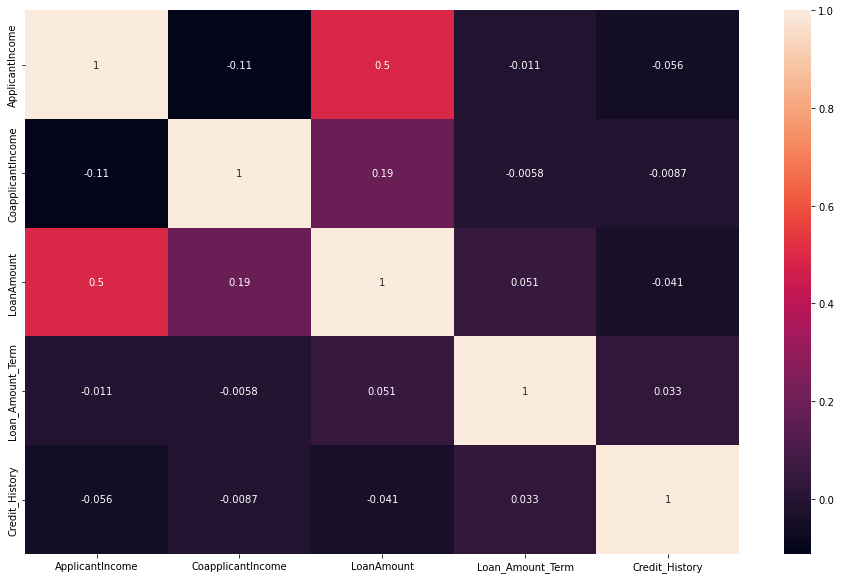

In [11]:
cor = df.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor, annot = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

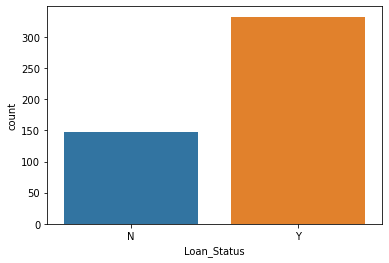

In [12]:
sns.countplot('Loan_Status', data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

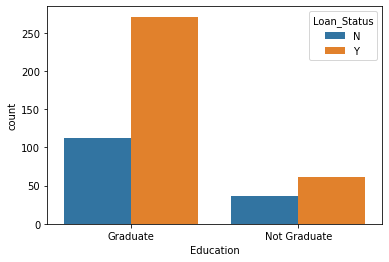

In [13]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

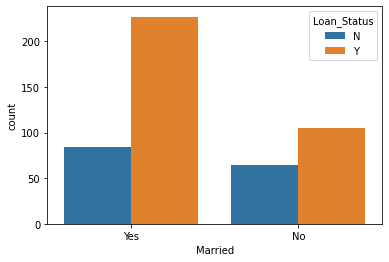

In [14]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [15]:
# label encoding
le = LabelEncoder()
df["Loan_Status"] = le.fit_transform(df["Loan_Status"])

In [16]:
# convert categorical columns to numerical values
df['Married'] = le.fit_transform(df['Married'])
df['Gender'] = le.fit_transform(df['Gender'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Education'] = le.fit_transform(df['Education'])

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    int32  
 2   Married            480 non-null    int32  
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    int32  
 5   Self_Employed      480 non-null    int32  
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    int32  
 12  Loan_Status        480 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 41.2+ KB


In [19]:
df["Dependents"] = df["Dependents"].astype('int32')

In [20]:
# separating the data and label
x = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']




Train Test Split

In [21]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

Training the model:

Support Vector Machine Model

In [22]:
clf = svm.SVC(kernel='linear')

In [23]:
#training the support Vector Macine model
clf.fit(x_train,y_train)

SVC(kernel='linear')

Model Evaluation

In [24]:
# accuracy on training data
training_accuray = clf.score(x_train,y_train)

In [25]:
print('Accuracy on training data : ', training_accuray)

Accuracy on training data :  0.8032407407407407


In [26]:
# accuracy on test data
test_accuray = clf.score(x_test,y_test)

In [27]:
print('Accuracy on test data : ', test_accuray)

Accuracy on test data :  0.8125


In [28]:
# accuracy score on training data
y_pred = clf.predict(x_test)
test_data_accuray = accuracy_score(y_test, y_pred)

In [29]:
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.8125


In [30]:
#confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 6  9]
 [ 0 33]]
